In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv("/Users/henry/Documents/Jupyter_files/Python/farmer_investment_yield_data.csv")

In [3]:
dataset.shape

(9995, 6)

In [4]:
dataset.describe()

,Investment
count,9995.000000
mean,3860.132966
std,2013.965425
min,800.000000
25%,1872.500000
50%,3750.000000
75%,5632.500000
max,7499.000000


In [5]:
dataset.head()

,Name,Age,Region,Gender,Investment,Yield
0,Ethyl,21,Western Region,Male,6855,3.8
1,Shelli,23,Northern Region,Female,7217,4
2,Rona,23,Upper East Region,Female,3342,2.3
3,Doro,25,Northern Region,Male,3318,2.3
4,Ronda,23,Upper West,Male,2154,2


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9995 entries, 0 to 9994
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9995 non-null   object
 1   Age         9992 non-null   object
 2   Region      9993 non-null   object
 3   Gender      9989 non-null   object
 4   Investment  9995 non-null   int64 
 5   Yield       9993 non-null   object
dtypes: int64(1), object(5)
memory usage: 468.6+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder

In [14]:
dataset = dataset.fillna(0)
dataset.Age=pd.to_numeric(dataset.Age, errors='coerce').astype(int)
dataset.Yield=pd.to_numeric(dataset.Yield, errors='coerce').astype(float)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9995 entries, 0 to 9994
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        9995 non-null   object 
 1   Age         9995 non-null   int64  
 2   Region      9995 non-null   object 
 3   Gender      9995 non-null   object 
 4   Investment  9995 non-null   int64  
 5   Yield       9995 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 468.6+ KB


In [15]:
dataset.head()

,Name,Age,Region,Gender,Investment,Yield
0,Ethyl,21,Western Region,Male,6855,3.8
1,Shelli,23,Northern Region,Female,7217,4.0
2,Rona,23,Upper East Region,Female,3342,2.3
3,Doro,25,Northern Region,Male,3318,2.3
4,Ronda,23,Upper West,Male,2154,2.0


In [16]:
dataset.describe()

,Age,Investment,Yield
count,9995.000000,9995.000000,9995.000000
mean,21.608204,3860.132966,2.653857
std,93.766899,2013.965425,0.742867
min,0.000000,800.000000,0.000000
25%,17.000000,1872.500000,1.900000
50%,20.000000,3750.000000,2.500000
75%,23.000000,5632.500000,3.300000
max,6370.000000,7499.000000,5.000000


In [17]:
dataset.head()

,Name,Age,Region,Gender,Investment,Yield
0,Ethyl,21,Western Region,Male,6855,3.8
1,Shelli,23,Northern Region,Female,7217,4.0
2,Rona,23,Upper East Region,Female,3342,2.3
3,Doro,25,Northern Region,Male,3318,2.3
4,Ronda,23,Upper West,Male,2154,2.0


In [18]:
dataset.drop(dataset[dataset['Age'] > 105].index, inplace = True) 

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9991 entries, 0 to 9994
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        9991 non-null   object 
 1   Age         9991 non-null   int64  
 2   Region      9991 non-null   object 
 3   Gender      9991 non-null   object 
 4   Investment  9991 non-null   int64  
 5   Yield       9991 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 546.4+ KB


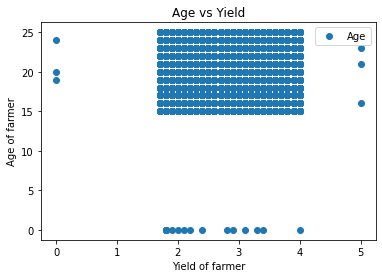

In [20]:
dataset.plot(x="Yield", y="Age", style='o')
plt.title('Age vs Yield')
plt.xlabel('Yield of farmer')
plt.ylabel('Age of farmer')
plt.show()

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

<ipython-input-24-32682d41b705>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


NameError: name 'xfit' is not defined

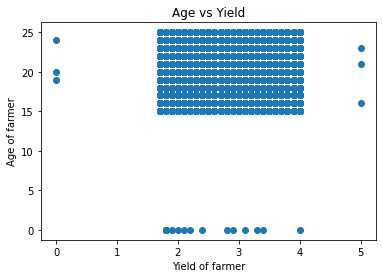

In [24]:
x = dataset.Yield
y = dataset.Age
model.fit(x[:, np.newaxis], y)
plt.title('Age vs Yield')
plt.xlabel('Yield of farmer')
plt.ylabel('Age of farmer')
plt.scatter(x, y)
plt.plot(xfit, yfit);

# It can be realised from the above that there is no correlation between age and yield. This means age is not a determinante of the quantity of yield to be made from the investment made by the farmer

In [26]:
x=dataset[["Investment"]]
y=dataset["Yield"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.9, random_state=0)

In [27]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = regressor.predict(X_test)

In [33]:
dataset = pd.DataFrame({'ActualYield': y_test, 'Predicted Yield': y_pred})
dataset.head()

,ActualYield,Predicted Yield
8478,1.8,1.730248
8861,2.9,2.989345
9691,4.0,3.925465
799,2.3,2.482280
9859,1.9,1.795864


In [34]:
print(dataset)

      ActualYield  Predicted Yield
8478          1.8         1.730248
8861          2.9         2.989345
9691          4.0         3.925465
799           2.3         2.482280
9859          1.9         1.795864
...           ...              ...
5750          1.8         1.627086
7458          3.1         3.135158
5160          2.8         2.896754
9578          2.4         2.590546
8181          2.3         2.343393

[8992 rows x 2 columns]


In [40]:
dataset.to_excel(r'predict.xlsx', index = False, header=True)